In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [7]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [8]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [9]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

person_education_encoder = OrdinalEncoder(categories=[['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate']])
df['person_education_Encoded'] = person_education_encoder.fit_transform(df[['person_education']])

df['person_gender_Encoded'] = df['person_gender'].map({'male': 0, 'female': 1})

person_home_ownership_encoder = OrdinalEncoder(categories=[['RENT', 'OWN', 'MORTGAGE', 'OTHER']])
df['person_home_ownership_Encoded'] = person_home_ownership_encoder.fit_transform(df[['person_home_ownership']])

loan_intent_encoder = OrdinalEncoder(categories=[['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT','DEBTCONSOLIDATION']])
df['loan_intent_Encoded'] = loan_intent_encoder.fit_transform(df[['loan_intent']])

df['previous_loan_defaults_on_file_Encoded'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

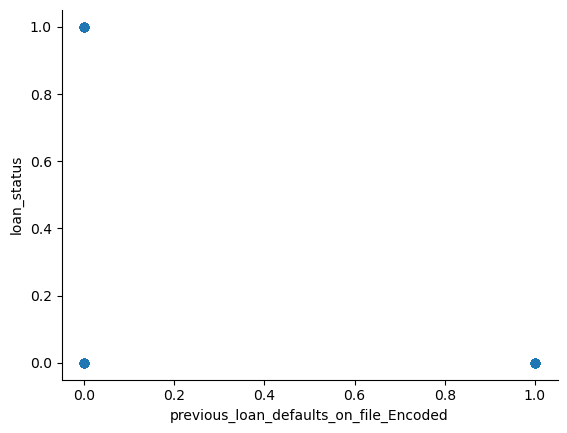

In [11]:
df.plot(kind='scatter', x='previous_loan_defaults_on_file_Encoded', y='loan_status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df[['person_age','person_gender_Encoded','person_education_Encoded','person_income','person_home_ownership_Encoded','person_emp_exp','loan_amnt',
    'loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_intent_Encoded','credit_score','previous_loan_defaults_on_file_Encoded',
    'loan_status']].corr()

,person_age,person_gender_Encoded,person_education_Encoded,person_income,person_home_ownership_Encoded,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_Encoded,credit_score,previous_loan_defaults_on_file_Encoded,loan_status
person_age,1.000000,-0.017528,0.052794,0.193698,0.037847,0.954412,0.050750,0.013402,-0.043299,0.861985,0.028694,0.178432,-0.025917,-0.021476
person_gender_Encoded,-0.017528,1.000000,-0.003099,-0.010173,-0.001507,-0.015078,-0.010647,-0.003662,0.000367,-0.011999,-0.002883,0.000223,-0.000704,0.000561
person_education_Encoded,0.052794,-0.003099,1.000000,0.002908,0.003767,0.048639,0.004241,-0.000525,0.007172,0.052224,0.003583,-0.015531,0.002373,0.001950
person_income,0.193698,-0.010173,0.002908,1.000000,0.216077,0.185987,0.242290,0.001510,-0.234177,0.124316,0.014983,0.035919,0.061483,-0.135808
person_home_ownership_Encoded,0.037847,-0.001507,0.003767,0.216077,1.000000,0.035354,0.148561,-0.129622,-0.142674,0.028744,0.012976,0.005715,0.128954,-0.239517
person_emp_exp,0.954412,-0.015078,0.048639,0.185987,0.035354,1.000000,0.044589,0.016631,-0.039862,0.824272,0.020855,0.186196,-0.029231,-0.020481
loan_amnt,0.050750,-0.010647,0.004241,0.242290,0.148561,0.044589,1.000000,0.146093,0.593011,0.042969,0.017300,0.009074,-0.059009,0.107714
loan_int_rate,0.013402,-0.003662,-0.000525,0.001510,-0.129622,0.016631,0.146093,1.000000,0.125209,0.018008,0.014161,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,0.000367,0.007172,-0.234177,-0.142674,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.002695,-0.011483,-0.203252,0.384880
cb_person_cred_hist_length,0.861985,-0.011999,0.052224,0.124316,0.028744,0.824272,0.042969,0.018008,-0.031868,1.000000,0.019566,0.155204,-0.022640,-0.014851


I select previous_loan_defaults_on_file_Encoded, loan_percent_income,loan_int_rate,loan_amnt,person_income, and person_home_ownership_Encoded for logistic regression because they show the highest correlation with loan_status, making them strong predictors, while other variables have negligible or weak correlations, adding little value to the model.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df[["previous_loan_defaults_on_file_Encoded", "loan_percent_income","loan_int_rate","loan_amnt", "person_income","person_home_ownership_Encoded"]]
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[["previous_loan_defaults_on_file_Encoded","loan_percent_income","loan_int_rate","loan_amnt", "person_income","person_home_ownership_Encoded"]])
X_test_scaled=scaler.transform(X_test[["previous_loan_defaults_on_file_Encoded","loan_percent_income","loan_int_rate","loan_amnt", "person_income","person_home_ownership_Encoded"]])

To prevent bias in the regression model, I apply standardization.

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
y_predict = model.predict(X_test_scaled)

In [19]:
print(y_test)

40428    0
13410    0
27376    0
10889    0
22764    0
        ..
15067    1
1302     1
3205     0
17679    0
20151    1
Name: loan_status, Length: 9000, dtype: int64


In [20]:
print(y_predict)

[0 0 0 ... 0 0 1]


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
report  = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7043
           1       0.75      0.73      0.74      1957

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.83      9000
weighted avg       0.89      0.89      0.89      9000



In [23]:
model.score(X_test_scaled, y_test)

0.8874444444444445

In [24]:
confusion_matrix(y_test, y_predict)

array([[6567,  476],
       [ 537, 1420]], dtype=int64)

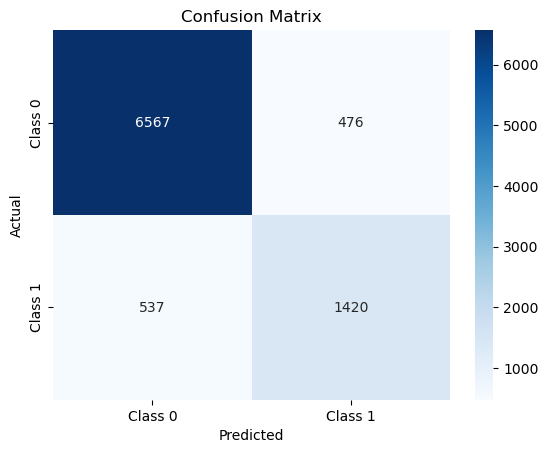

In [25]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
model.intercept_

array([-5.16592833])

In [27]:
model.coef_

array([[-4.38919542,  1.23026179,  0.96179235, -0.54779131,  0.0404888 ,
        -0.37438504]])

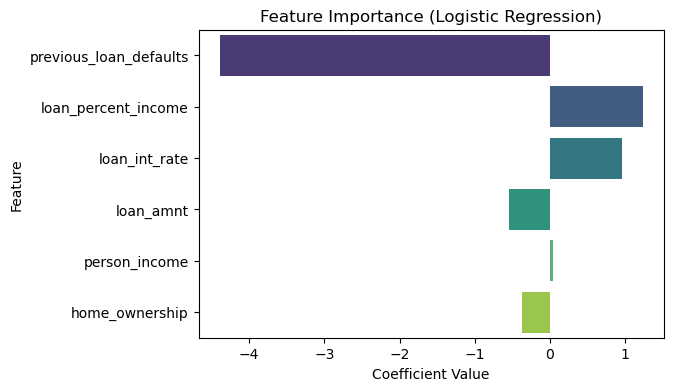

In [28]:
feature_names = ["previous_loan_defaults", "loan_percent_income", "loan_int_rate", "loan_amnt", "person_income", "home_ownership"]
coefficients = model.coef_[0]

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=coefficients, y=feature_names, palette="viridis")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

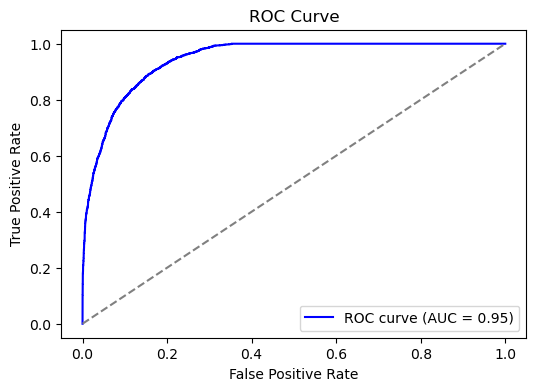

In [29]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()